In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
df = pd.read_csv("combined_dataset_temp.csv").drop(columns=["Unnamed: 0", "GAUL", "M49", "Area", "Year"])
df["Casualties"] = df["Casualties"].fillna(0)
df["Undernourishment (%)"] = df["Undernourishment (%)"].replace({"<2.5": 0})
df["Undernourishment (%)"] = pd.to_numeric(df["Undernourishment (%)"])
df = df.dropna()

In [18]:
df.head()

,GDP (MUSD),GNI (MUSD),Food Prod. Index,Temperature,Precipitation,Casualties,Undernourishment (%)
0,3598.470576,3598.407195,62.42,286.086560,42.992387,5553.0,47.8
1,4141.523943,4134.295420,75.74,285.637743,64.661574,1157.0,45.6
2,4729.042179,4721.728965,77.83,284.996151,74.464959,944.0,40.6
3,5388.482107,5396.722695,75.77,285.864614,66.059247,817.0,38.0
4,6220.574147,6231.622214,84.68,284.481630,78.640260,1711.0,36.1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3070 entries, 0 to 3219
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GDP (MUSD)            3070 non-null   float64
 1   GNI (MUSD)            3070 non-null   float64
 2   Food Prod. Index      3070 non-null   float64
 3   Temperature           3070 non-null   float64
 4   Precipitation         3070 non-null   float64
 5   Casualties            3070 non-null   float64
 6   Undernourishment (%)  3070 non-null   float64
dtypes: float64(7)
memory usage: 191.9 KB


In [20]:
y = df["Undernourishment (%)"]
X = df[df.columns.drop("Undernourishment (%)")]

In [21]:
#train / test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=12, test_size=0.2)

In [22]:
forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
print("model score on training data:",forest.score(X_train, y_train))

model score on training data: 0.978693200003342


In [24]:
print("model score on test data:",forest.score(X_test, y_test))

model score on test data: 0.8635654231042772


In [25]:
feature_names = [x for x in X.columns]
importances = forest.feature_importances_

print(importances)

[0.11206957 0.26953863 0.06685165 0.20879473 0.23142718 0.11131824]


In [26]:
sorted_lists = sorted(zip(importances, feature_names), reverse=True)

In [27]:
importances, feature_names = [x[0] for x in sorted_lists], \
    [x[1] for x in sorted_lists]

In [28]:
forest.predict(X_test.iloc[0].to_numpy().reshape(1,-1))

c:\Users\nmart\anaconda3\envs\badass_daten_jungs\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.41])

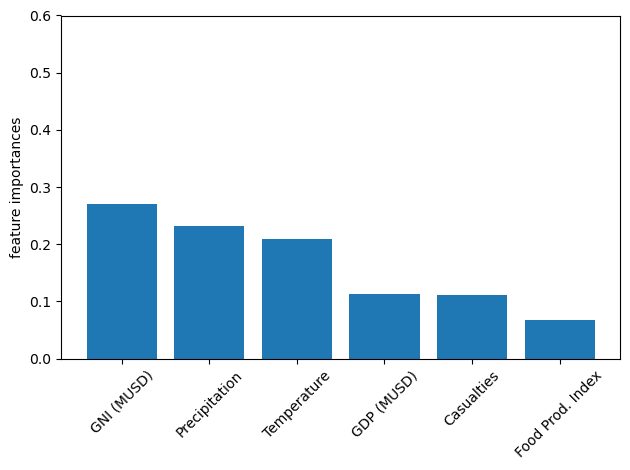

In [29]:
plt.figure()
plt.bar(feature_names, importances)
plt.xticks(rotation=45)
plt.ylabel("feature importances")
plt.ylim(0,0.6)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

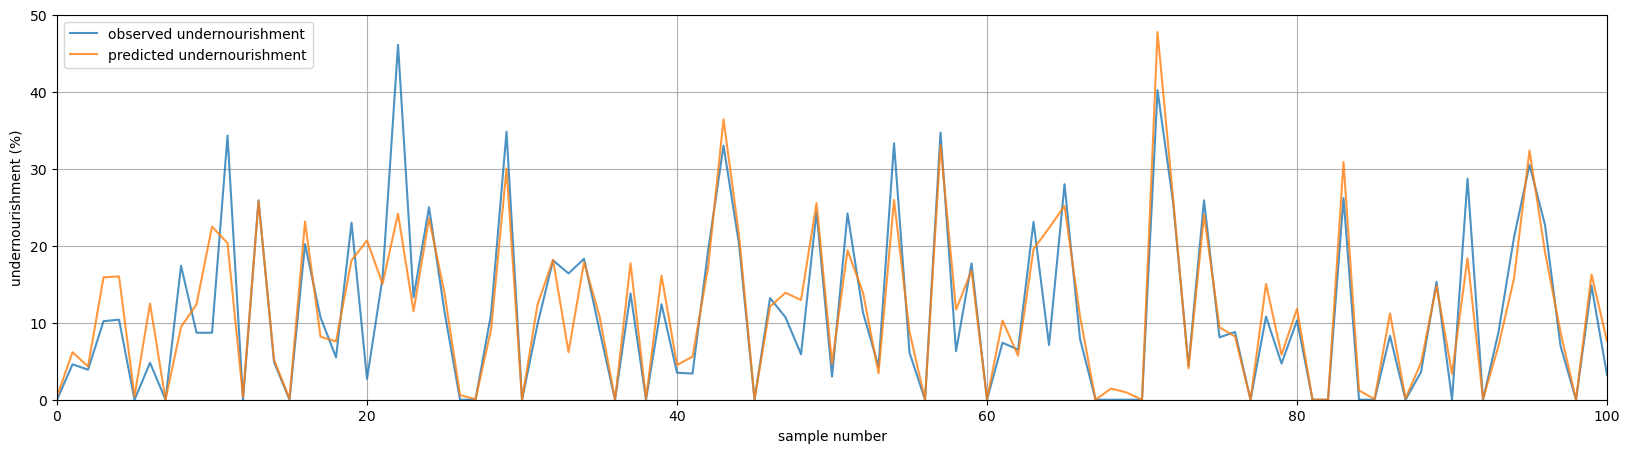

In [30]:
plt.figure()
plt.figure(figsize=(20, 5))
plt.plot(y_test.to_numpy(), alpha=0.8, label="observed undernourishment")
plt.plot(forest.predict(X_test),alpha=0.8, label="predicted undernourishment")
plt.xlabel("sample number")
plt.ylabel("undernourishment (%)")
plt.legend(loc="upper left")
plt.xlim(0,100)
plt.ylim(0,50)
plt.grid()
plt.show()